## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [4]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
#Check current label size
y_test[0]

9

In [0]:
#Lets print the image as well
import numpy as np
import matplotlib.pyplot as plt

img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names= ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
#Now check the label size
y_test[0]

9

###4. Find no.of samples in training and test dataset

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

###5. Find dimensions of an image in the dataset

In [11]:
x_train[0].shape

(28, 28)

### 6. Verify if existing labels/Classes are correct 

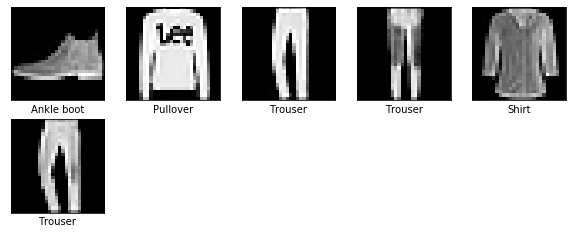

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel(class_names[y_test[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
#Convert labels to one hot encoding
y_train_converted = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_converted = tf.keras.utils.to_categorical(y_test, num_classes=10)


###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_norm =  x_train/255
x_test_norm = x_test/255

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
 x_train_reshaped =tf.keras.backend.expand_dims(x_train_norm,axis=-1)
 x_test_reshaped = tf.keras.backend.expand_dims(x_test_norm,axis=-1)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())


###10. Import the necessary layers from keras to build the model

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))



### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))




In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4718720   
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Train the model
model.fit(x_train_reshaped,y_train_converted,          
          validation_data=(x_test_reshaped,y_test_converted),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.3592 - accuracy: 0.8718 - val_loss: 0.2987 - val_accuracy: 0.8918
Epoch 2/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2175 - accuracy: 0.9197 - val_loss: 0.2445 - val_accuracy: 0.9128
Epoch 3/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1506 - accuracy: 0.9436 - val_loss: 0.2505 - val_accuracy: 0.9153
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0964 - accuracy: 0.9633 - val_loss: 0.2726 - val_accuracy: 0.9222
Epoch 5/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0624 - accuracy: 0.9770 - val_loss: 0.3317 - val_accuracy: 0.9150
Epoch 6/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0392 - accuracy: 0.9853 - val_loss: 0.3887 - val_accuracy: 0.9116
Epoch 7/10
60000/60000 [=========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:

#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model2.add(tf.keras.layers.Flatten())

#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))


#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))




In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [0]:
#Train the model
model2.fit(x_train_reshaped,y_train_converted,          
          validation_data=(x_test_reshaped,y_test_converted),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3766 - acc: 0.8646 - val_loss: 0.2822 - val_acc: 0.8989
Epoch 2/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2416 - acc: 0.9113 - val_loss: 0.2319 - val_acc: 0.9173
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1905 - acc: 0.9306 - val_loss: 0.2307 - val_acc: 0.9188
Epoch 4/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1539 - acc: 0.9424 - val_loss: 0.2219 - val_acc: 0.9206
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.1227 - acc: 0.9542 - val_loss: 0.2383 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1011 - acc: 0.9621 - val_loss: 0.2458 - val_acc: 0.9241
Epoch 7/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0849 - acc: 0.9682 - val_l

###13. Verify accuracy of the model

> 

####14. Verify performance of your model selectively 

In [0]:
x_test[0].shape

(28, 28)

In [0]:
x_train[0].shape

In [0]:
predictions = model.predict(x_train_reshaped)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='green')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

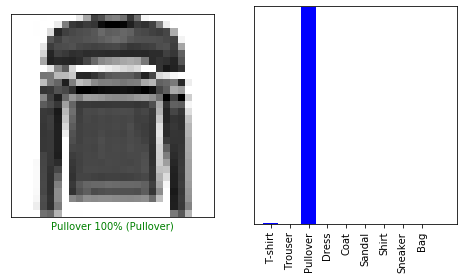

In [28]:
import numpy as np
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

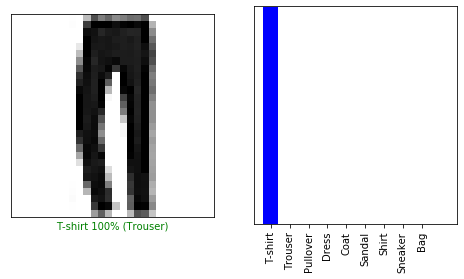

In [29]:
#Replace value of i with other index to check other product
i = 2
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=5,)


In [0]:
trainx = tf.keras.backend.expand_dims(x_train,axis=-1)

In [0]:
trainx.shape


TensorShape([Dimension(60000), Dimension(28), Dimension(28), Dimension(1)])

In [0]:
datagen.fit(x_train_reshaped)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

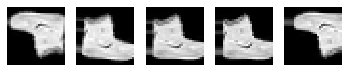

In [33]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_reshaped[0:1],batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()